In [54]:
import pandas as pd, numpy as np
import sklearn
import scipy.sparse
import warnings
warnings.filterwarnings('ignore')
from sklearn.feature_extraction.text import CountVectorizer
from scipy import sparse
from sklearn.metrics import confusion_matrix
from bs4 import BeautifulSoup
import re
from sklearn.metrics import f1_score,roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfTransformer



In [20]:
train_data = pd.read_csv('../data/raw_data/train.csv')
test_data = pd.read_csv('../data/raw_data/test.csv')

train_labels=(train_data["Labels"])
test_labels = test_data["Labels"]

corpus_train = train_data["Comment"]
corpus_test = test_data["Comment"]

In [21]:
vectorizer = CountVectorizer(strip_accents='unicode',lowercase=True,stop_words='english', analyzer="word",token_pattern=r'\w{1,}')
train_feature_vectors_sparse = vectorizer.fit_transform(corpus_train)
vectorizer_test = CountVectorizer(strip_accents='unicode',lowercase=True,stop_words='english', analyzer="word",token_pattern=r'\w{1,}', vocabulary= vectorizer.get_feature_names())
test_feature_vectors_sparse = vectorizer_test.fit_transform(corpus_test)

In [56]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=2, n_iter=100)

In [57]:
new = svd.fit_transform(train_feature_vectors_sparse) 
new_test = svd.fit_transform(test_feature_vectors_sparse)

[0, 2, 0, 10]

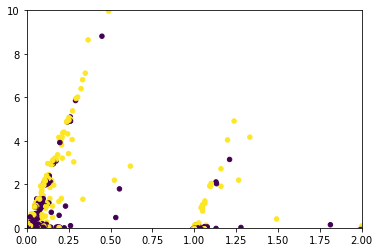

In [61]:
import matplotlib.pyplot as plt
import matplotlib
plt.scatter(new_test[:,0],new_test[:,1],s=20,c=test_labels, marker = 'o')
plt.axis([0,2,0,10])

In [55]:
# vectorizer = TfidfTransformer(norm=None, smooth_idf=True, sublinear_tf=False, use_idf=True)
# train_feature_vectors_sparse = vectorizer.fit_transform(train_feature_vectors_sparse)
# test_feature_vectors_sparse = vectorizer.fit_transform(test_feature_vectors_sparse)

clf = LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=None, penalty='l2', random_state=None,
          solver='lbfgs', tol=0.0001, verbose=0, warm_start=False)

clf.fit(new, train_labels)

predictions = clf.predict(new_test)
confmat = confusion_matrix(test_labels, predictions)

precision = confmat[1,1]/(confmat[1,1] + confmat[1,0])
recall = confmat[1,1]/(confmat[1,1] + confmat[0,1])
fScore = f1_score(test_labels, predictions, average='macro')
ccr = (confmat[0,0] + confmat[1,1])/(sum(sum(confmat)))
roc_auc = roc_auc_score(test_labels, predictions)
print("Precision = ",precision)
print("Recall = ",recall)
print("F_score = ",fScore)
print("CCR = ",ccr)
print("ROC_AUC = ", roc_auc)
print()
print("Confusion Matrix: \n", confmat)
print()

Precision =  0.08825884991190133
Recall =  0.5969664138678223
F_score =  0.5517894578895284
CCR =  0.9052174184876051
ROC_AUC =  0.5409078089517937

Confusion Matrix: 
 [[57363   372]
 [ 5692   551]]

